<a href="https://colab.research.google.com/github/QuangLe102/AI/blob/main/Nhandienkhuonmat_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

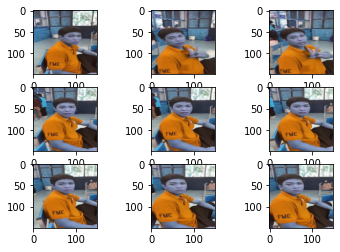

In [136]:
#import thư viện

from sklearn.utils import shuffle

import math as m

import cv2
import pickle
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Sequential
from sklearn.preprocessing import scale
from keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.layers import Dense, Activation, Dropout,Flatten
from tensorflow.keras.utils import to_categorical 

with open('Nhandienkhuonmat_CNN.pickle', 'rb') as f:
  (x_train, y_train), (x_test, y_test) = pickle.load(f)
x_pre1 = x_train
x_pre2 = x_test
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()


In [137]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [138]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)
y_train.shape

(90, 3)

In [139]:
from keras.layers.pooling import MaxPooling2D
from keras.layers import Conv2D
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape = (150, 150, 3)))
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2, 2)))

#ANN
model.add(Flatten())
model.add(Dense(64, activation = 'relu', kernel_initializer= 'he_uniform'))
model.add(Dense(128, activation = 'relu', kernel_initializer= 'he_uniform'))
model.add(Dense(3, activation= 'softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 conv2d_61 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 conv2d_63 (Conv2D)          (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                

In [140]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, epochs = 20, batch_size=64, validation_data = (x_test, y_test), verbose = 1)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


2/2 [==============================] - 10s 4s/step - loss: 1.7887 - accuracy: 0.3333 - val_loss: 2.0699 - val_accuracy: 0.2083
Epoch 2/20
2/2 [==============================] - 10s 4s/step - loss: 1.6294 - accuracy: 0.3778 - val_loss: 1.0699 - val_accuracy: 0.4167
Epoch 3/20
2/2 [==============================] - 10s 4s/step - loss: 1.1263 - accuracy: 0.3222 - val_loss: 1.0904 - val_accuracy: 0.3750
Epoch 4/20
2/2 [==============================] - 10s 4s/step - loss: 1.0855 - accuracy: 0.3333 - val_loss: 1.0891 - val_accuracy: 0.3750
Epoch 5/20
2/2 [==============================] - 10s 4s/step - loss: 1.0335 - accuracy: 0.4222 - val_loss: 0.9359 - val_accuracy: 0.6250
Epoch 6/20
2/2 [==============================] - 10s 4s/step - loss: 0.8510 - accuracy: 0.6667 - val_loss: 0.6835 - val_accuracy: 0.6250
Epoch 7/20
2/2 [==============================] - 10s 4s/step - loss: 0.9313 - accuracy: 0.6111 - val_loss: 1.0618 - val_accuracy: 0.4167
Epoch 8/20
2/2 [=============================

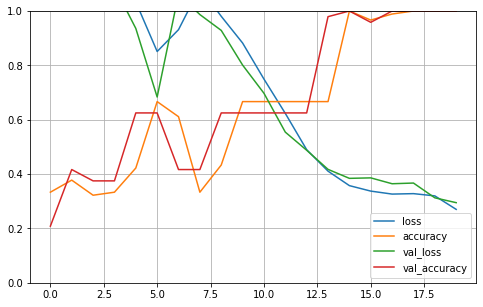

In [141]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

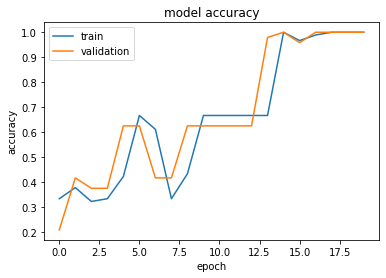

In [142]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

(150, 150, 3)
[1]


'Đây là Chiến'

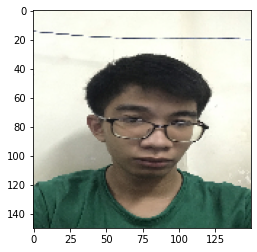

In [143]:
test = 10
plt.imshow(cv2.cvtColor(x_pre2[test], cv2.COLOR_BGR2RGB))
print(x_pre2[test].shape)
img = x_pre2[test].reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['Đây là Phước', 'Đây là Chiến', 'Đây là Đức']
Label[pred[0]]

(150, 150, 3)
[0]


'Đây là Phước'

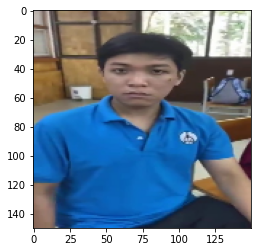

In [144]:
test = 5
plt.imshow(cv2.cvtColor(x_pre2[test], cv2.COLOR_BGR2RGB))
print(x_pre2[test].shape)
img = x_pre2[test].reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['Đây là Phước', 'Đây là Chiến', 'Đây là Đức']
Label[pred[0]]

(150, 150, 3)
[2]


'Đây là Đức'

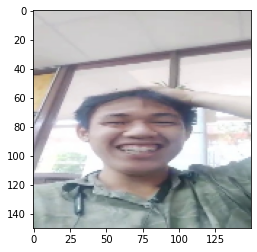

In [145]:
test = 41
plt.imshow(cv2.cvtColor(x_pre2[test], cv2.COLOR_BGR2RGB))
print(x_pre2[test].shape)
img = x_pre2[test].reshape(1,150,150,3)
img = img.astype('float32')
img /= 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['Đây là Phước', 'Đây là Chiến', 'Đây là Đức']
Label[pred[0]]